#导入数据和扩展包 

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

D:\windows\software\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 读取数据

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


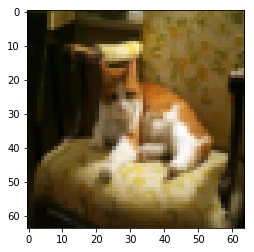

In [3]:
# Example of a picture
index = 7
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
print(train_y)

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [6]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

In [7]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    grads={}
    costs= []
    m=X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1  = parameters["b1"]
    W2 = parameters["W2"]
    b2  = parameters["b2"]
    
    for i in range(0,num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2,'sigmoid')
        
        cost = compute_cost(A2, Y)
        
        dA2 = -(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        dA1, dW2, db2 =linear_activation_backward(dA2, cache2,'sigmoid')
        dA0, dW1, db1 =linear_activation_backward(dA1, cache1, 'relu')
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        if print_cost and i%100 == 0:
            print("cost after iteration{}: {}" .format(i, np.squeeze(cost)))
        if print_cost and i%100 == 0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
        

cost after iteration0: 0.6930497356599888
cost after iteration100: 0.6464320953428849
cost after iteration200: 0.6325140647912677
cost after iteration300: 0.6015024920354665
cost after iteration400: 0.5601966311605747
cost after iteration500: 0.5158304772764729
cost after iteration600: 0.47549013139433255
cost after iteration700: 0.43391631512257495
cost after iteration800: 0.4007977536203886
cost after iteration900: 0.3580705011323798
cost after iteration1000: 0.3394281538366412
cost after iteration1100: 0.3052753636196264
cost after iteration1200: 0.2749137728213015
cost after iteration1300: 0.24681768210614846
cost after iteration1400: 0.19850735037466108
cost after iteration1500: 0.17448318112556654
cost after iteration1600: 0.17080762978096023
cost after iteration1700: 0.11306524562164728
cost after iteration1800: 0.09629426845937154
cost after iteration1900: 0.08342617959726861
cost after iteration2000: 0.07439078704319084
cost after iteration2100: 0.06630748132267932
cost after 

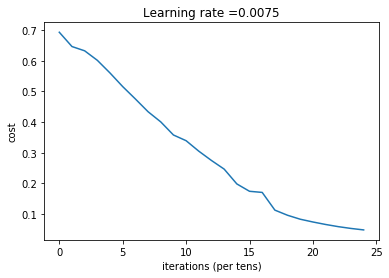

In [8]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [9]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [10]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [83]:
layers_dims = [12288, 20, 7, 5, 1]

In [84]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    np.random.seed(1)
    costs =[]
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%100 == 0:
            print("cost after iteration %i %f " %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations(per tend)')
    plt.title("learning rate = " +str(learning_rate))
    plt.show()
    
    return parameters

cost after iteration 0 0.771749 
cost after iteration 100 0.672053 
cost after iteration 200 0.648263 
cost after iteration 300 0.611507 
cost after iteration 400 0.567047 
cost after iteration 500 0.540138 
cost after iteration 600 0.527930 
cost after iteration 700 0.465477 
cost after iteration 800 0.369126 
cost after iteration 900 0.391747 
cost after iteration 1000 0.315187 
cost after iteration 1100 0.272700 
cost after iteration 1200 0.237419 
cost after iteration 1300 0.199601 
cost after iteration 1400 0.189263 
cost after iteration 1500 0.161189 
cost after iteration 1600 0.148214 
cost after iteration 1700 0.137775 
cost after iteration 1800 0.129740 
cost after iteration 1900 0.121225 
cost after iteration 2000 0.113821 
cost after iteration 2100 0.107839 
cost after iteration 2200 0.102855 
cost after iteration 2300 0.100897 
cost after iteration 2400 0.092878 


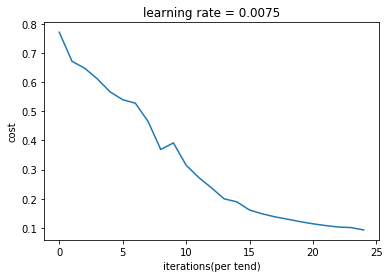

In [85]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [82]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9856459330143539
Accuracy: 0.8


Accuracy: 0.0
y = 1.0, your L-layer model predicts a "cat"picture


D:\windows\software\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
D:\windows\software\anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


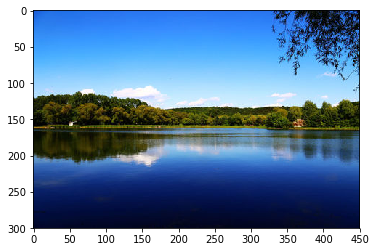

In [90]:
my_image = "test4.jpg" 
my_image_y = [0]

fname = "images/"+ my_image
image= np.array(ndimage.imread(fname, flatten = False))
#scipy.ndimage.imread(fname,flatten=False): 将图片转换为数组，如果mode默认为‘RGB’，则返回的数组的形状为（height , width, 3)


my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((num_px*num_px*3,1))
#注意矩阵格式大小

#scipy.misc.imresize设定图片的大小尺寸
my_predicted_image = predict(my_image, my_image_y, parameters)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\"picture")

In [91]:
print(my_predicted_image)

[[1.]]


In [80]:
print(parameters)

{'W1': array([[ 0.01672799, -0.00641608, -0.00338875, ..., -0.00685887,
        -0.00593783,  0.01060475],
       [ 0.01395808,  0.00407498, -0.0049068 , ...,  0.01317046,
         0.00221326,  0.00930175],
       [-0.00123843, -0.00597204,  0.00472214, ...,  0.00101904,
        -0.00862638, -0.00505112],
       ...,
       [ 0.00140823, -0.00137711,  0.0163992 , ..., -0.00846451,
        -0.00761603, -0.00149162],
       [-0.00168698, -0.00618577, -0.01023935, ...,  0.02050705,
        -0.00428185,  0.00149319],
       [-0.01770891, -0.0067836 ,  0.00756873, ...,  0.01730701,
         0.01297081, -0.00322241]]), 'b1': array([[ 3.85542520e-03],
       [ 8.18087056e-03],
       [ 6.52138546e-03],
       [ 2.85633678e-03],
       [ 6.01081275e-03],
       [ 8.17122684e-04],
       [ 3.72986493e-04],
       [ 7.05992009e-04],
       [ 4.36344692e-04],
       [ 1.90827285e-03],
       [-6.51686461e-03],
       [ 6.97258125e-03],
       [-1.08988113e-03],
       [ 5.40858776e-03],
       [ 